## Observations and Insights

### Summary statistics
- Just by looking at the summary statistis for each regimen wen can determine that Capomulin and Ramicane are the two most promising drugs since we can observe that on both drug regimes the average of the tumor volume drops by around 25% compared to the rest of the drugs tested
- Infubinol and Ceftamin are the next two best Tumor Volume Averages although the difference is not that big as with Capomulin and Ramicane

### Bar chart for number of of measurements
- This graph was made, mostly to determine if the number of measurements is consistent across all the drugs tested
- By looking at the graph the number of measures are pretty consistent with each other
- Ramicane and Capomulin are the drugs with most measures, by around 50 measures wich constitutes a significant difference with the rest of the drugs, I will do further analysis to determine if the measures difference is significant to the results

### Mouse Sex Distribution
- The pie chart represents the percentage of female vs male mouses, with a 0.7% difference I will say that the mouse population is evenly distributed by gender

### Quartiles, Outliers and Boxplots
- This analysis was done to determine if the data between the top four most promising drugs is valid
- The analysis shows that the only drug with potential outliers is Infubinol, the outlier is very far away from the rest of the data
- It's interesting that the outlier would fit into the Capomulin or Ramicane data, this suggests the possibility that this particular mouse drug was mislabeled
- With the number of measures available and the data reliability tests results I recommend that any further analysis done about Infubinol simply deletes the outlier mouse instead of spending resources trying to save the data of that test subject
- This analysis also allows me to determine that the number of measures on Capomulin and Ramicane does not compromise the quality of the data available

### Line and Scatter Plots
- This analysis allows us to study individual mouses for Capomulin and see the reduction of the Tumor Volume over time
- Besides the obvious negative tendency in the tumor volume over time we can see that for some mouses the biggest negative slope is between timepoint 0 and 10, but we can also see a slight volume increase between timepoints 15-20

### Correlation and Linear Regression Model
- With this analysis we determine that there is a strong correlation between a mouse weight and the Tumor Volume
- It is important to note that a strong correlation does not necessarily reflects a cause-effect relationship
- On the other hand, correlation is useful to build a linear regression model and determine expected values. With the formula provided we can determine an expected tumor volume by simply measuring a mouse weight and use it as a control variable, but not a predicted value

In [3]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# saving paths, opening csv files and saving them into dataframes
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merging the dataframes
merged_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

merged_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# cleaning data

#lines below checks for duplicated ID's on mouse metadata, can be commented if test is succesful
# mice_count = merged_study['Mouse ID'].unique()
# len(mice_count)

#looking for duplicates on the dataframe unique mouses should be 249
mouse_count = merged_study[['Mouse ID', 'Timepoint']].value_counts()
mouse_count = pd.DataFrame(mouse_count).reset_index()
mouse_count = mouse_count.rename(columns={0: 'Count'})

#at least 1 duplicated row, need to check for more
#slicing the dataframe to contain only duplicated values
duplicated_rows = mouse_count.loc[(mouse_count['Count'] > 1),:]

duplicated_rows.head(10)

,Mouse ID,Timepoint,Count
0,g989,15,2
1,g989,0,2
2,g989,10,2
3,g989,5,2
4,g989,20,2


In [5]:
# obtaining a series with the Mouse ID of all the ones that are duplicated

dup_ID = duplicated_rows['Mouse ID'].unique()

print("The duplicated mouse(s) ID are: " + str(dup_ID))

The duplicated mouse(s) ID are: ['g989']


In [6]:
# display the duplicated data to double-check rows to delete
dup_data = merged_study.loc[(merged_study['Mouse ID'].isin(dup_ID)), :]

dup_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# deleting duplicated data keeping last values
clean_study = merged_study.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='last')

clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# double checking so that I didn't deleted any valid data
print ("The study was done in: " + str(len(clean_study['Mouse ID'].unique())) + " unique mouses")

The study was done in: 249 unique mouses


## Summary Statistics

In [9]:
#statistical summary calculations

#grouping by drug regimen
drug_grouped_summ = clean_study.groupby('Drug Regimen').describe()

#filtering unnecessary data and converting to dataframe
drug_grouped_summ = pd.DataFrame(drug_grouped_summ['Tumor Volume (mm3)']).reset_index()

#computing variance and adding to df
variance = drug_grouped_summ['std'] ** 2
drug_grouped_summ['Variance'] = variance

#computing SEM and adding to df
std_dev = drug_grouped_summ['std']
value_count = drug_grouped_summ['count']
sem_ = std_dev / (value_count ** 0.5)
drug_grouped_summ['SEM'] = sem_


#dropping unecessary columns, rearranging, and renaming
drug_grouped_summ = drug_grouped_summ[['Drug Regimen', 'mean', '50%', 'Variance', 'std', 'SEM']]
drug_grouped_summ = drug_grouped_summ.rename(columns= {'mean': 'Mean', '50%': 'Median', 'std': 'Std Dev'})

drug_grouped_summ.head(15)


,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [10]:
# repeat the calculations from above but using a single line approach (aggregate)
drug_grouped_summ_agg = clean_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').aggregate([np.mean, np.median, np.var, np.std, st.sem])

drug_grouped_summ_agg.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

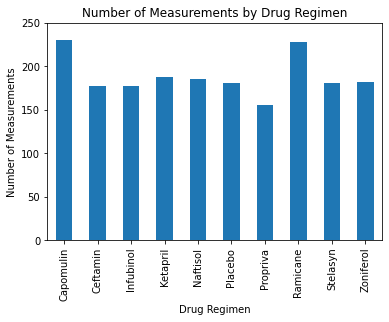

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#creating the dataframe with data to plot
bar_plot_data = clean_study[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen').count()
bar_plot_data = bar_plot_data.rename(columns = {'Mouse ID': 'Number of Measurements'})

#plotting and formatting
bar_plot_data.plot(kind ='bar', title = 'Number of Measurements by Drug Regimen', ylim = [0, 250], legend = False,
                  ylabel='Number of Measurements')

<BarContainer object of 10 artists>

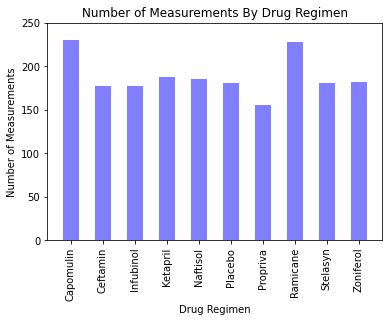

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plot parameters
bar_plot_data = bar_plot_data.reset_index()

x = bar_plot_data['Drug Regimen']
y = bar_plot_data['Number of Measurements']
plt.ylim(0, 250)
plt.title("Number of Measurements By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)

#plotting with matplotlib
plt.bar(x, y, color='b', alpha=0.5, align="center", width=0.5)

<AxesSubplot:title={'center':'Mouse Sex Distribution'}, ylabel='Mouse ID'>

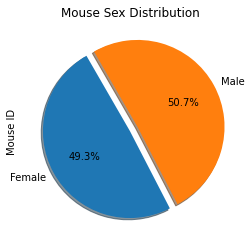

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#pulling data from the study
sex_dist = clean_study[['Mouse ID', 'Sex']].groupby('Sex').count().reset_index()
#plotting using pandas
sex_dist.plot(y='Mouse ID', kind ='pie', title = 'Mouse Sex Distribution', legend=False, autopct="%1.1f%%", explode=(0, 0.1),
              shadow = True, startangle = 120, labels = sex_dist['Sex'])

([<matplotlib.patches.Wedge at 0x1b3c3fca280>,
 [Text(-0.9651809632762859, -0.527660599371472, 'Female'),
  Text(1.0529247411048357, 0.5756296461869516, 'Male')],
 [Text(-0.5264623436052468, -0.28781487238443926, '49.3%'),
  Text(0.6142060989778207, 0.33578396027572177, '50.7%')])

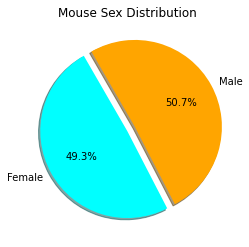

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()

#plot parameters
labels = sex_dist['Sex']
sizes = sex_dist['Mouse ID']
colors = ["cyan", "orange"]
title = "Mouse Sex Distribution"

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)
ax.set(aspect="equal", title='Mouse Sex Distribution')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#getting the final tumor volume
#dataframe is sorted by Mouse ID and timepoint, dropping duplicates whilst maintaining the last value
merged_study.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='last')
final_tumor = clean_study.drop_duplicates(subset='Mouse ID', keep='last')

#filtering the dataframe for the studies to analyze
final_tumor = final_tumor.loc[(final_tumor['Drug Regimen']=='Capomulin')|
                              (final_tumor['Drug Regimen']=='Ramicane')|
                              (final_tumor['Drug Regimen']=='Infubinol')|
                              (final_tumor['Drug Regimen']=='Ceftamin'), :]

#selecting only relevant columns and resetting the index
final_tumor = final_tumor.reset_index()
final_tumor = final_tumor[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

final_tumor


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472
...,...,...,...
95,x822,Ceftamin,61.386660
96,y163,Infubinol,67.685569
97,y769,Ceftamin,68.594745
98,y865,Ceftamin,64.729837


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    #slicing the dataframe for the current iteration
    data = final_tumor.loc[final_tumor['Drug Regimen'] == x, :]
    
    #obtaining quartiles, IQR and boundaries
    quartiles = data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - (1.5 * (quartiles[0.75] - quartiles[0.25]))
    upper_bound = quartiles[0.75] + (1.5 * (quartiles[0.75] - quartiles[0.25]))
    
    #finding the outliers if there is any
    upper_outliers = data.loc[data['Tumor Volume (mm3)'] > upper_bound]
    lower_outliers = data.loc[data['Tumor Volume (mm3)'] < lower_bound]
    total_outliers = len(upper_outliers) + len(lower_outliers)
    
    #conditional to print out the results
    #if there are outliers prints the information about the Mouse
    if total_outliers > 0:
        print (f'For the drug {x} there are {total_outliers} potential outlier(s)')
        if len(upper_outliers) > 0:
            print(upper_outliers)
        if len(lower_outliers) > 0:
            print(lower_outliers)
    else:
        print (f'For the drug {x} there are {total_outliers} potential outlier(s)')            
    

For the drug Ramicane there are 0 potential outlier(s)
For the drug Capomulin there are 0 potential outlier(s)
For the drug Infubinol there are 1 potential outlier(s)
   Mouse ID Drug Regimen  Tumor Volume (mm3)
58     c326    Infubinol           36.321346
For the drug Ceftamin there are 0 potential outlier(s)


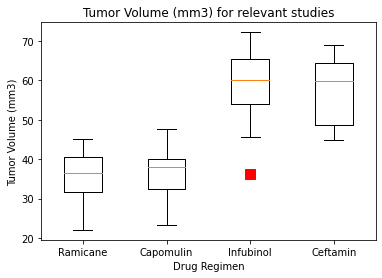

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#building the dictionary values
#for loop creates a dictionary with the name of the regimen as key and the tumor volumes as series
tumor_dic = {}
for x in treatments:
    data = final_tumor.loc[final_tumor['Drug Regimen'] == x, :]
    data = data['Tumor Volume (mm3)'].tolist()
    tumor_dic[x] = data
    
#graph parameters
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) for relevant studies')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops = dict(marker='s', markerfacecolor='r', markersize=10, linestyle='none', markeredgecolor='r') #outliers format
ax1.boxplot(tumor_dic.values(), flierprops= flierprops)
ax1.set_xticklabels(tumor_dic.keys())
plt.show()



## Line and Scatter Plots

From the list of mouse ID's please type the one you want to see the plot for:
['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157']
ID: r554


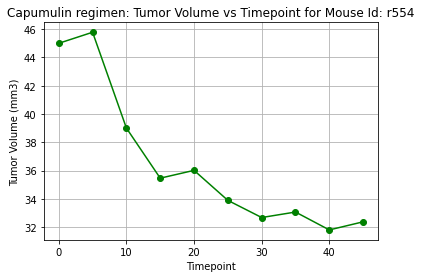

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#new dataframe with only the mouses treated with capomulin
capomulin_data = clean_study.loc[clean_study['Drug Regimen'] == 'Capomulin', :]

#retrieving mouse id's
mouse_id = capomulin_data['Mouse ID'].unique().tolist()

#asking user for the mouse to plot
print ('From the list of mouse ID\'s please type the one you want to see the plot for:')
print (mouse_id)

#for testing purposes, switch comments below when testing is done
#mouse_plot = 's185'
mouse_plot = input ('ID: ')

#obtaining mouse data
plot_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_plot, :]
x_axis = plot_data['Timepoint'].tolist()
y_axis = plot_data['Tumor Volume (mm3)'].tolist()

#graph parameters
plt.title(f'Capumulin regimen: Tumor Volume vs Timepoint for Mouse Id: {mouse_plot}')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

mouse_line = plt.plot(x_axis, y_axis, marker ='o', color='green')



<AxesSubplot:title={'center':'Weight vs Average Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

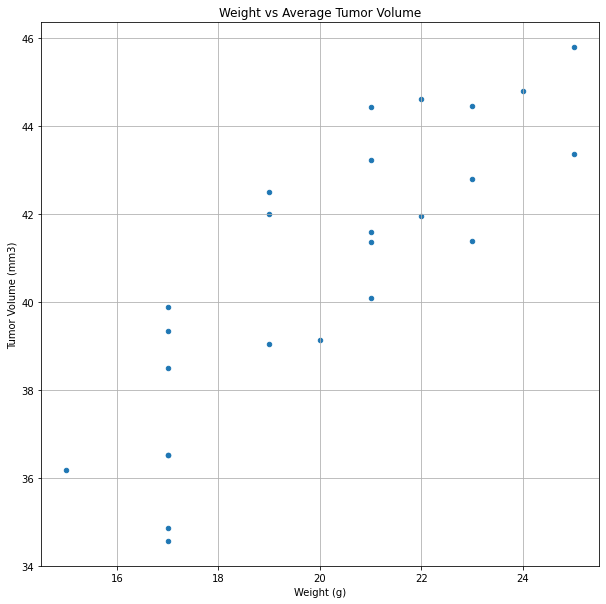

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#obtaining tumor volume average
tumor_average = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

tumor_average.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10),
                   title="Weight vs Average Tumor Volume")


## Correlation and Regression

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])
print(f"The Pearson correlation factor between Weight and Tumor Volume is {round(correlation[0],2)}")


The Pearson correlation factor between Weight and Tumor Volume is 0.84


The R squared is:0.71


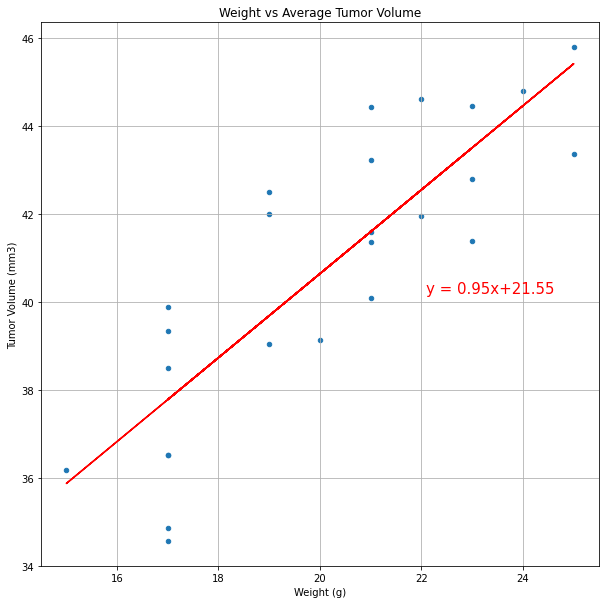

In [165]:
#Creatting the linear regression model

# Add the linear regression equation and line to plot

#setting x and y for line
x_values = tumor_average['Weight (g)']
y_values = tumor_average['Tumor Volume (mm3)']
(m, b, r, p, stderr) = st.stats.linregress(x_values, y_values)

tumor_average.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10),
                   title="Weight vs Average Tumor Volume")
line_eq = 'y = ' + str(round(m, 2)) + 'x+' + str(round (b, 2))
plt.annotate(line_eq,(22.1,40.2),fontsize=15,color="red")
plt.plot(x_values, m*x_values + b, color ='r')

print ('The R squared is:' + str(round(r**2, 2)))